In [1]:
!pip install catboost

     |████████████████████████████████| 65.8MB 55kB/s 


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Предсказание гос переворотов/Colab Калиниченко М/baseline_model/baseline_dataset_cleaned.csv')

In [4]:
df.head(15)

,Unnamed: 0,country,target year,coup in year - 1,coup in year - 2,coup in year - 3,coup in year - 4,coup in year - 5,coup in year - 6,coup in year - 7,coup in year - 8,coup in year - 9,coup in year - 10,coup in year - 11,coup in year - 12,coup in year - 13,coup in year - 14,coup in year - 15,coup in year - 16,coup in year - 17,coup in year - 18,coup in year - 19,coup in year - 20,coup in target year
0,11110,North African Respublic,1950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11109,Afghanistan,1965,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11108,Afghanistan,1966,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11107,Afghanistan,1967,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11106,Afghanistan,1968,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,11105,Afghanistan,1969,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,11104,Afghanistan,1970,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,11103,Afghanistan,1971,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,11102,Afghanistan,1972,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,11101,Afghanistan,1973,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df_country = df.country
df_country_ohe = pd.get_dummies(df_country, columns=['country'], dummy_na=True)

In [6]:
y = df['coup in target year']
X = pd.concat([df_country_ohe, df.drop(['coup in target year', 'country'], 1)], axis=1)

In [7]:
X

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,...,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States of America,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Yemen,Yemen Arab Republic,Zambia,Zimbabwe,NaN,Unnamed: 0,target year,coup in year - 1,coup in year - 2,coup in year - 3,coup in year - 4,coup in year - 5,coup in year - 6,coup in year - 7,coup in year - 8,coup in year - 9,coup in year - 10,coup in year - 11,coup in year - 12,coup in year - 13,coup in year - 14,coup in year - 15,coup in year - 16,coup in year - 17,coup in year - 18,coup in year - 19,coup in year - 20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11110,1950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11109,1965,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11108,1966,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11107,1967,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11106,1968,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,2015,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0
11107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2016,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0
11108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2017,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0
11109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2485) #возможно не очень хорошо, т к обучение идёт на том же куске данных, что и тестирование , тослько сдвинутом на 1

In [9]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model = CatBoostClassifier(max_depth=5, iterations=60000, early_stopping_rounds=10, auto_class_weights='Balanced')
model.fit(X_train, y_train)
predicted = model.predict(X_test)


Выходные данные были обрезаны до нескольких последних строк (5000).
55000:	learn: 0.2829055	total: 4m 5s	remaining: 22.3s
55001:	learn: 0.2829038	total: 4m 5s	remaining: 22.3s
55002:	learn: 0.2829013	total: 4m 5s	remaining: 22.3s
55003:	learn: 0.2828998	total: 4m 5s	remaining: 22.3s
55004:	learn: 0.2828965	total: 4m 5s	remaining: 22.3s
55005:	learn: 0.2828931	total: 4m 5s	remaining: 22.3s
55006:	learn: 0.2828914	total: 4m 5s	remaining: 22.2s
55007:	learn: 0.2828897	total: 4m 5s	remaining: 22.2s
55008:	learn: 0.2828896	total: 4m 5s	remaining: 22.2s
55009:	learn: 0.2828844	total: 4m 5s	remaining: 22.2s
55010:	learn: 0.2828827	total: 4m 5s	remaining: 22.2s
55011:	learn: 0.2828774	total: 4m 5s	remaining: 22.2s
55012:	learn: 0.2828739	total: 4m 5s	remaining: 22.2s
55013:	learn: 0.2828702	total: 4m 5s	remaining: 22.2s
55014:	learn: 0.2828668	total: 4m 5s	remaining: 22.2s
55015:	learn: 0.2828643	total: 4m 5s	remaining: 22.2s
55016:	learn: 0.2828625	total: 4m 5s	remaining: 22.2s
55017:	learn: 

In [10]:
model.save_model('max_depth=5, iterations=60000, early_stopping_rounds=10, auto_class_weights=\'Balanced\'')

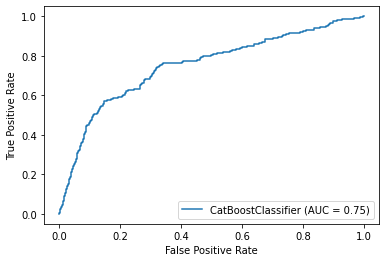

In [11]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)

In [12]:
from sklearn.metrics import f1_score, confusion_matrix

F_mera = f1_score(y_test, predicted)
print("F_mera =", F_mera)

print(confusion_matrix(y_test, predicted))
#print(model.get_best_score())

F_mera = 0.24791418355184744
[[3710  530]
 [ 101  104]]


In [13]:
from matplotlib import pyplot as plt

In [14]:
probabilities = model.predict_proba(X_test)[:, 1]

In [15]:
mean_prob_1 = 0
cnt_1 = 0
for i in range(len(probabilities)):
  if (y_test.to_list()[i] == 1):
    mean_prob_1 += probabilities[i]
    cnt_1 += 1
    #print("prob 1 =", probabilities[i], "answer =", y_test.to_list()[i])

mean_prob_1 = mean_prob_1 / cnt_1
mean_prob_1

0.47488703124811626

In [16]:
y_test_with_answers = pd.DataFrame(y_test)
y_test_with_answers['probabilities'] = probabilities
#y_test_with_answers.sort_values(['coup in target year','probabilities']).tail(10)
y_test_with_answers.sort_values(['probabilities']).tail(10)

,coup in target year,probabilities
4418,1,0.944353
9379,0,0.945929
9849,0,0.946317
9804,0,0.949257
4140,0,0.954400
8750,0,0.955475
386,0,0.956509
6013,1,0.964350
6943,0,0.969001
6014,0,0.970976


In [17]:
print(df.loc[6013].to_list(), "answer =", y_test.loc[6013])
print(df.loc[4418].to_list(), "answer =", y_test.loc[4418])
print(df.loc[9803].to_list(), "answer =", y_test.loc[9803])
print(df.loc[2490].to_list(), "answer =", y_test.loc[2490])
print("===============================")
print(df.loc[6014].to_list(), "true answer =", y_test.loc[6014])
print(df.loc[386].to_list(), "true answer =", y_test.loc[386])
print(df.loc[9849].to_list(), "true answer =", y_test.loc[9849])

[5097, 'Mauritania', 1982, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] answer = 1
[6692, 'Iran', 1982, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] answer = 1
[1307, 'Thailand', 1977, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1] answer = 1
[8620, 'Democratic Republic of the Congo', 1979, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 3, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1] answer = 1
[5096, 'Mauritania', 1983, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] true answer = 0
[10724, 'Argentina', 1965, 0, 1, 2, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0] true answer = 0
[1261, 'Togo', 1968, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] true answer = 0


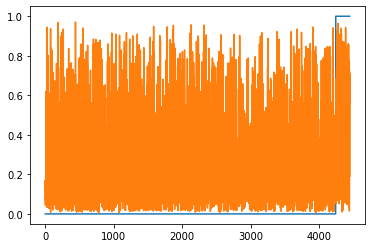

In [20]:
plt.plot(y_test_with_answers.sort_values(['coup in target year'])['coup in target year'].to_list())
plt.plot(y_test_with_answers.sort_values(['coup in target year'])['probabilities'].to_list())
#оранжевые - предсказанные вероятности 
#синие - правильные отыеты 